# Letter Distributions

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from string import ascii_lowercase
import numpy as np

In [2]:
names = pd.read_excel('../Data/babynames1996to2021.xlsx', sheet_name='2', skiprows=7, na_values=['[x]']).set_index('Name')
names = names[[name for name in names.columns if 'Rank' in name]]

1
2


In [3]:
names_copy = names.copy()
top_names = names_copy[(names_copy<300).any(axis=1)]
names_list = pd.Series(top_names.index)

In [4]:
names_list = names_list.str.lower()

alphabet_dict = {letter: [] for letter in ascii_lowercase}

def get_value(name):
    section = 1/len(name)
    
    for i, letter in enumerate(name):
        if letter in ascii_lowercase:
            alphabet_dict[letter].append(section*i)
    
names_list.apply(get_value) 

0      None
1      None
2      None
3      None
4      None
       ... 
605    None
606    None
607    None
608    None
609    None
Name: Name, Length: 610, dtype: object

In [5]:
occurances = {letter:len(alphabet_dict[letter]) for letter in alphabet_dict.keys()}
occurances

{'a': 633,
 'b': 61,
 'c': 81,
 'd': 57,
 'e': 428,
 'f': 28,
 'g': 34,
 'h': 121,
 'i': 361,
 'j': 26,
 'k': 52,
 'l': 330,
 'm': 127,
 'n': 265,
 'o': 128,
 'p': 32,
 'q': 3,
 'r': 196,
 's': 147,
 't': 114,
 'u': 32,
 'v': 27,
 'w': 8,
 'x': 10,
 'y': 157,
 'z': 20}

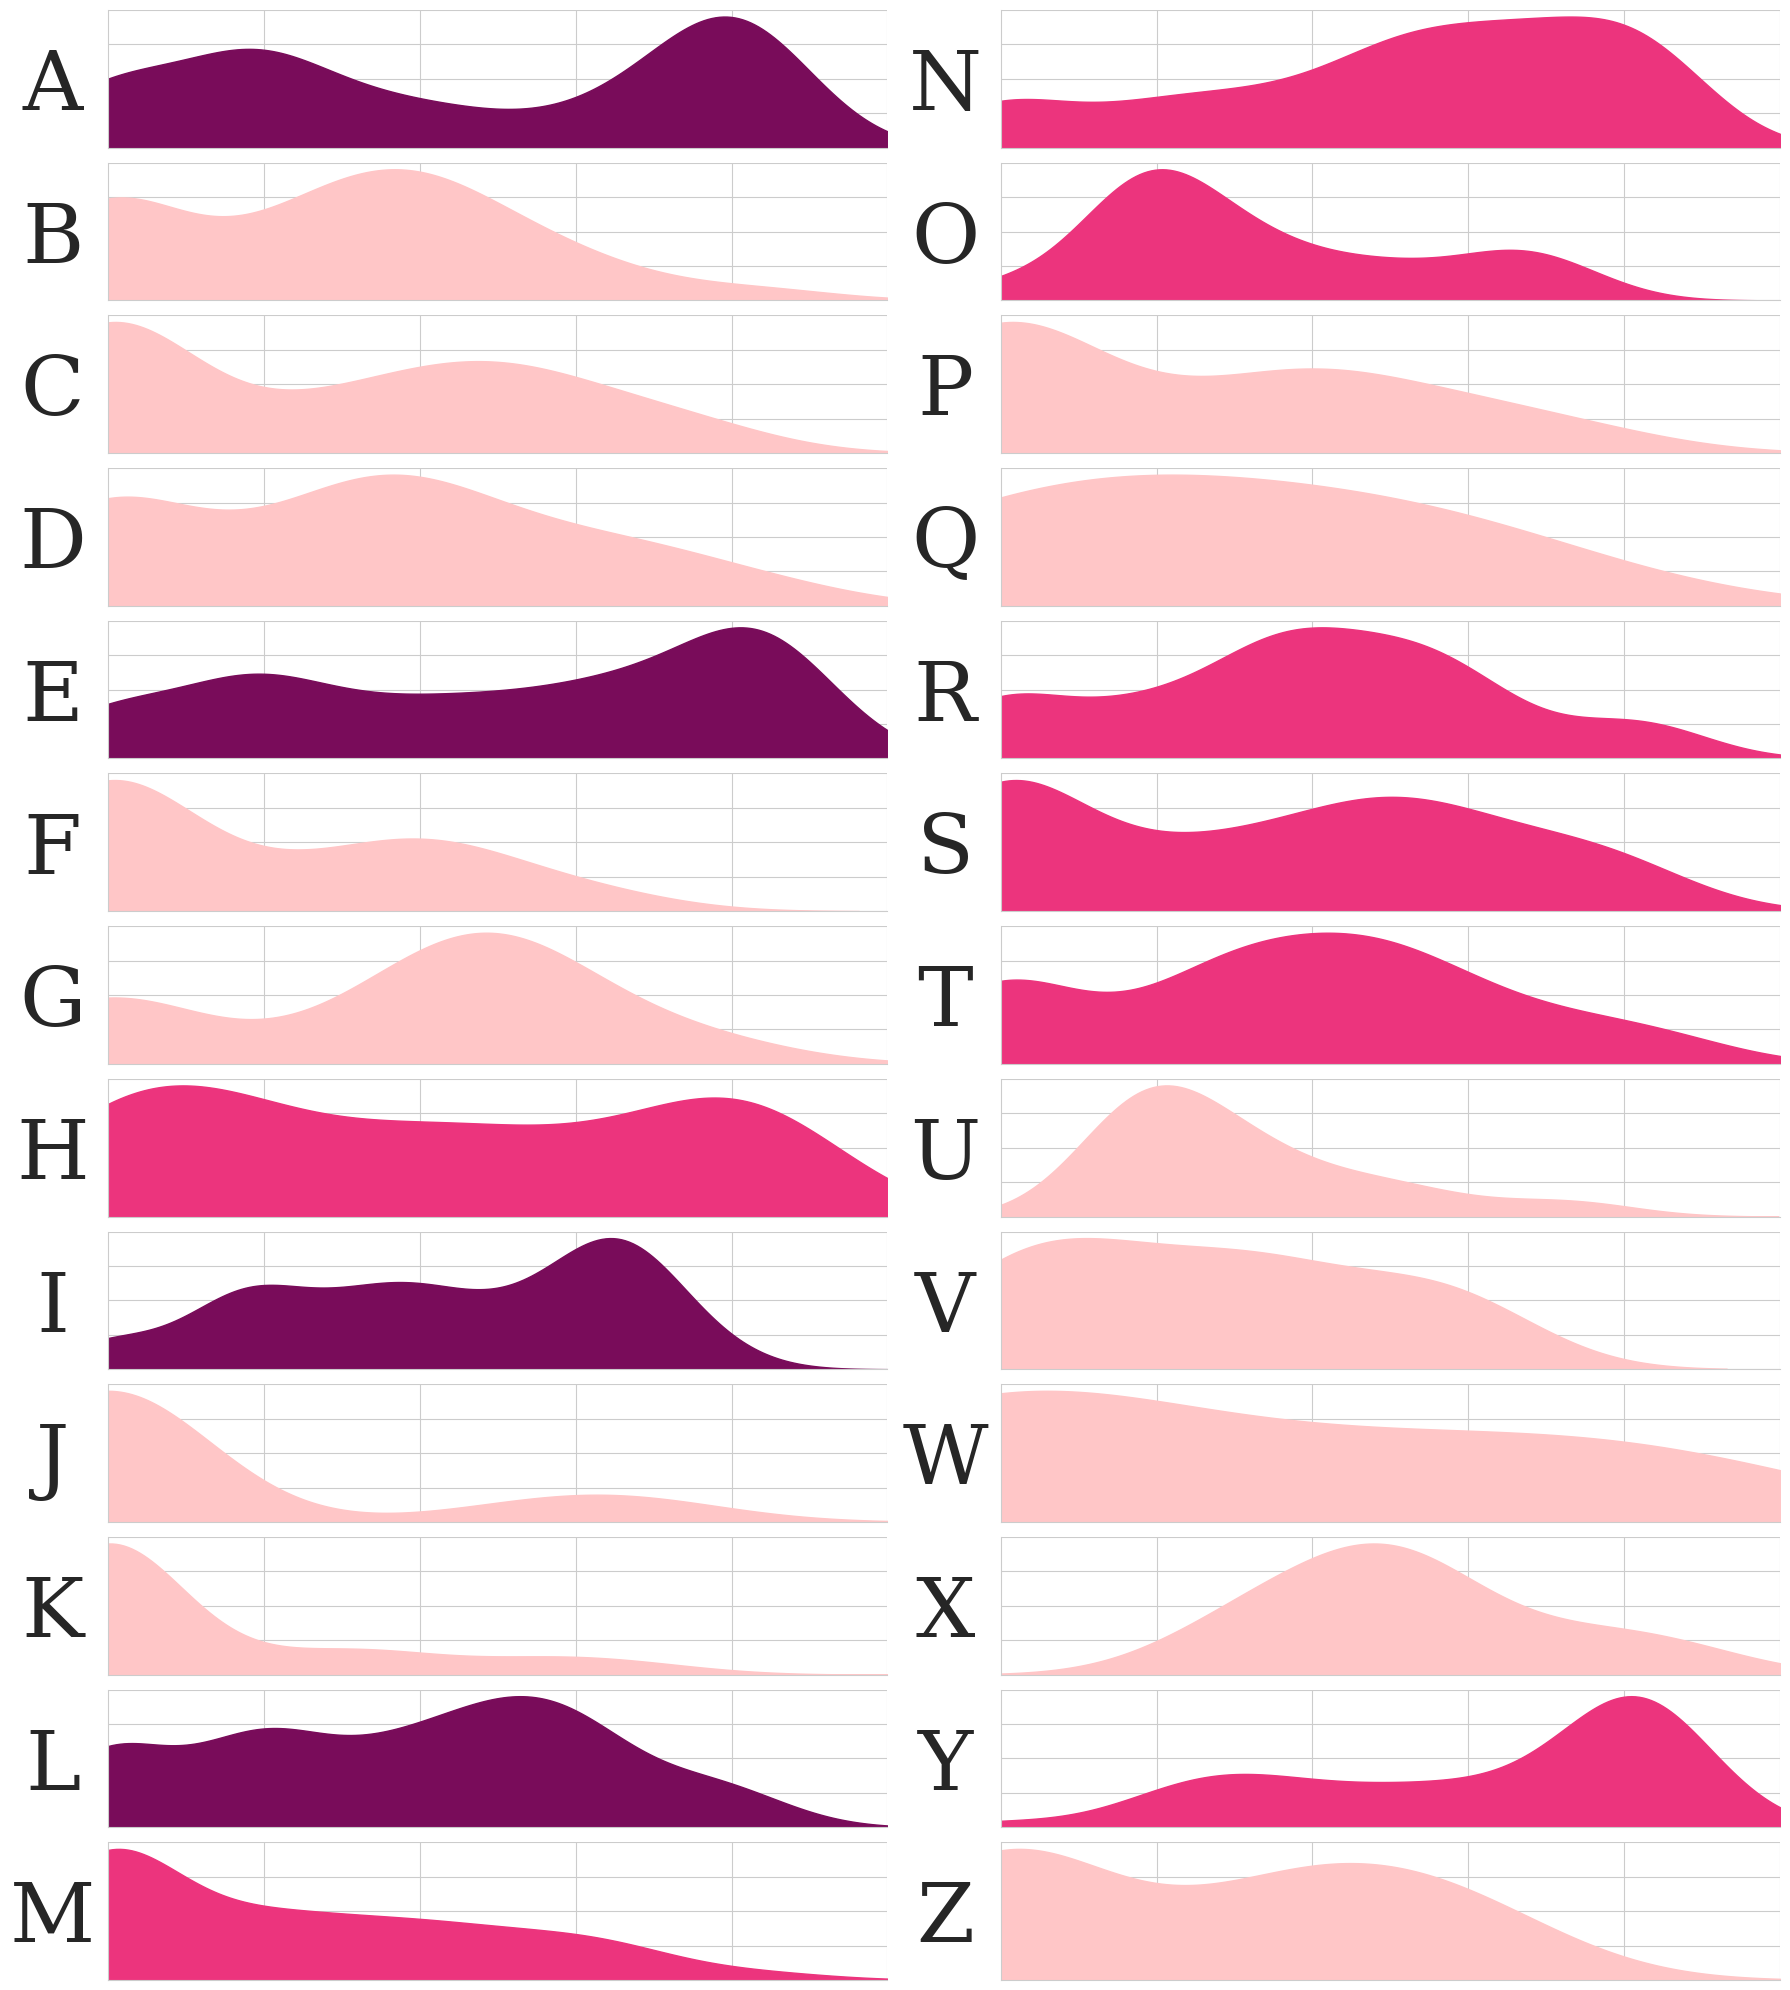

In [51]:
fig, axes = plt.subplots(13, 2, figsize=(18, 20))
#fig.suptitle('Letter Distribution')
fig.tight_layout(pad=1) 

sns.set_style("whitegrid")

for i, letter in enumerate(alphabet_dict.keys()):
    values = alphabet_dict[letter]
    
    # axes
    ax1, ax2 = 0, i
    if i >12:
        ax1, ax2 = 1, i-13
    ax = axes[ax2, ax1]
    
    # color
    if len(values)<100:
        color = "#FFC6C7"
    elif len(values)>300:
        color="#790C5A"
    else:
        color= "#EC347D"
    
     
    sns.kdeplot(values, clip=(0.0, 1.0), fill=True, ax=ax, color=color, alpha=1)
    
    ax.set_xlim(0, 1)
    ax.set_ylabel(letter.upper(), rotation=0, fontsize=60, labelpad=40, y=0.15, fontfamily='serif')
    
    #ax.set_title(letter.upper())
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.set_xticks([0.2, 0.4, 0.6, 0.8, 1])
    
    ax.set_yticks(np.linspace(0, ax.get_ylim()[1], num=5))
    
    #ax.get_xaxis().set_visible(False)
    #ax.get_yaxis().set_visible(False)
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.setp(ax.get_yticklabels(), visible=False)
    
#plt.grid(color='yellow', linewidth=1, axis='both', alpha=0.5)
plt.tight_layout()
#plt.show()

plt.savefig('letter_distribution.png')